In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [2]:
message = pd.read_csv('SMSSpamCollection.txt',sep='\t',
                     names=['label','message'])

In [3]:
message

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
message['message'].loc[4500]

'SMS SERVICES. for your inclusive text credits, pls goto www.comuk.net login= 3qxj9 unsubscribe with STOP, no extra charge. help 08702840625.COMUK. 220-CM2 9AE'

In [5]:
import re 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [7]:
corpus = []
for i in range(0,len(message)):
    review = re.sub('[^a-zA-Z]',' ',message['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [8]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500,binary=True,ngram_range=(2,2))
X = cv.fit_transform(corpus).toarray()

In [10]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
X.shape

(5572, 2500)

In [12]:
y = pd.get_dummies(message['label'])
y = y.iloc[:,1].values

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=100)

In [14]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train,y_train)

In [15]:
y_pred = spam_detect_model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix

In [17]:
score = accuracy_score(y_test,y_pred)
print(score*100)

97.60765550239235


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.97      1.00      0.99      1448
        True       0.99      0.83      0.90       224

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.98      1672



In [19]:
cm = confusion_matrix(y_pred,y_test)

In [20]:
cm

array([[1446,   38],
       [   2,  186]], dtype=int64)

In [21]:
import seaborn as sns 


<Axes: >

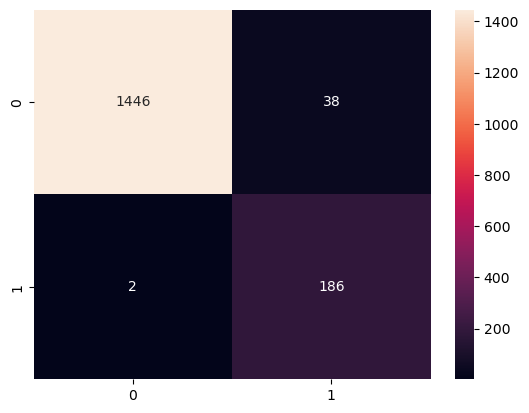

In [22]:
sns.heatmap(cm,annot=True,fmt='.4g',xticklabels=True,yticklabels=True)

In [23]:
# TFIDF model

from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500,ngram_range=(1,2),binary=True)
X = tv.fit_transform(corpus).toarray()

In [24]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
X.shape

(5572, 2500)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=100)

In [27]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train,y_train)

In [28]:
# predict 
y_pred = spam_detect_model.predict(X_test)

In [29]:
score = accuracy_score(y_pred,y_test)
print(score*100)

97.96650717703349


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1448
        True       1.00      0.85      0.92       224

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [31]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1448    0]
 [  34  190]]


<Axes: >

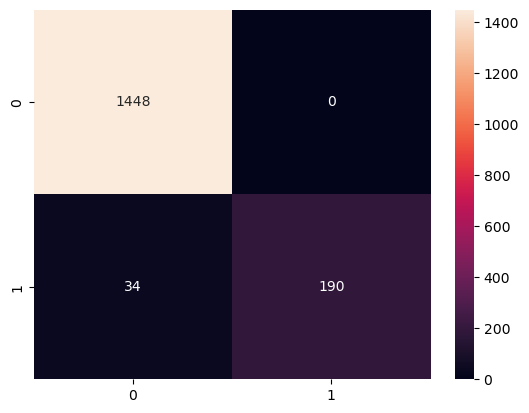

In [32]:
sns.heatmap(cm,annot=True,fmt='.4g',xticklabels=True,yticklabels=True)

98.32535885167464


              precision    recall  f1-score   support

       False       1.00      0.98      0.99      1474
        True       0.88      0.99      0.93       198

    accuracy                           0.98      1672
   macro avg       0.94      0.99      0.96      1672
weighted avg       0.99      0.98      0.98      1672



<Axes: >

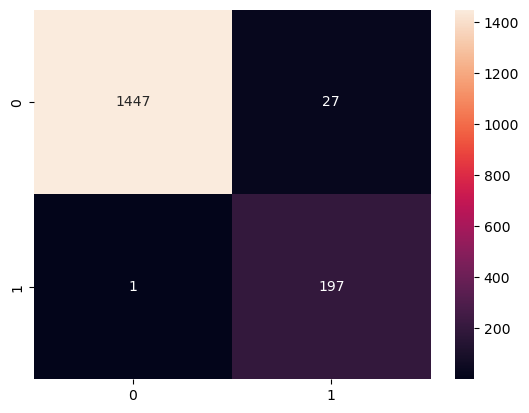

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
score = accuracy_score(y_pred,y_test)
print(score*100)
print('\n')
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,fmt='.4g',xticklabels=True,yticklabels=True,annot=True)